# MATH 280 Lecture 13: Least squares problems

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## Example 1: Linear regression

Cricket chirps vs Temperature. 

source: https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html
*The songs of insects* by G.W. Pierce, Harvard University Press (1948).

In [13]:
T=np.array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 82.0, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5, 76.3])
c=np.array([20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7, 17.1, 15.4, 16.2, 15.0, 17.2, 16.0, 17.0, 14.4])

<IPython.core.display.Javascript object>


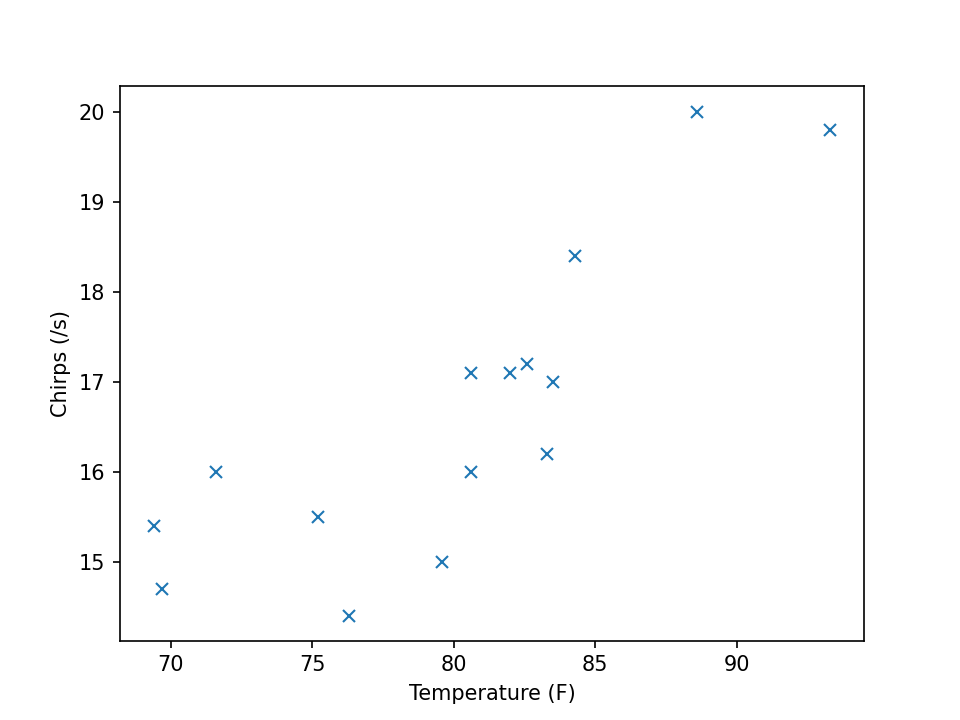

Text(0, 0.5, 'Chirps (/s)')

In [14]:
plt.plot(T,c, 'x')
plt.xlabel('Temperature (F)')
plt.ylabel('Chirps (/s)')

We want to find a line 
$$c(T)=\beta_0+\beta_1 T =  \begin{bmatrix} 1 & T \end{bmatrix}\begin{bmatrix} \beta_0\\ \beta_1 \end{bmatrix},$$
that best approximates the data set.

### Least squares error

$$
\sum_{i=1}^n (c(T_i)-c_i)^2 = \sum_{i=1}^n (\beta_0 +\beta_1 T_i-c_i)^2
$$


<center>...(Derivation on blackboard)...</center>


$$
=\left \| A \underline{\beta} - \underline{c}\right\|^2
$$

where

$$ A= 
\begin{bmatrix} 
1  & T_1\\
1  & T_2\\
\vdots & \vdots\\
1  & T_n
\end{bmatrix}, \qquad 
\underline{\beta} = \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}, \qquad
\underline{c} = \begin{bmatrix} c_1\\c_2\\ \vdots \\c_n\end{bmatrix}
$$


